<a href="https://colab.research.google.com/github/Safaljoc/CanvasCorner/blob/main/2462231_SafalJoshi_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Load Dataset

In [ ]:
df = pd.read_csv("suicide_rate.csv")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### Data Cleaning & Preprocessing

In [ ]:
# 1. Clean all column names (VERY IMPORTANT)
df.columns = df.columns.str.strip()

# 2. Convert GDP column from string to integer
df["gdp_for_year ($)"] = (
    df["gdp_for_year ($)"]
    .astype(str)
    .str.replace(",", "")
    .astype(int)
)


In [ ]:
df[["gdp_for_year ($)"]].head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


### HANDLE MISSING VALUES (HDI)

In [ ]:
# Check missing values
df.isnull().sum()


,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,19456
gdp_for_year ($),0


#### Fill Missing HDI Using Median

In [ ]:
df["HDI for year"] = df["HDI for year"].fillna(df["HDI for year"].median())



In [ ]:
df["HDI for year"].isnull().sum()


np.int64(0)

In [ ]:
df.isnull().sum()


,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,0
gdp_for_year ($),0


## EXPLORATORY DATA ANALYSIS (EDA)

### Distribution of Target Variable


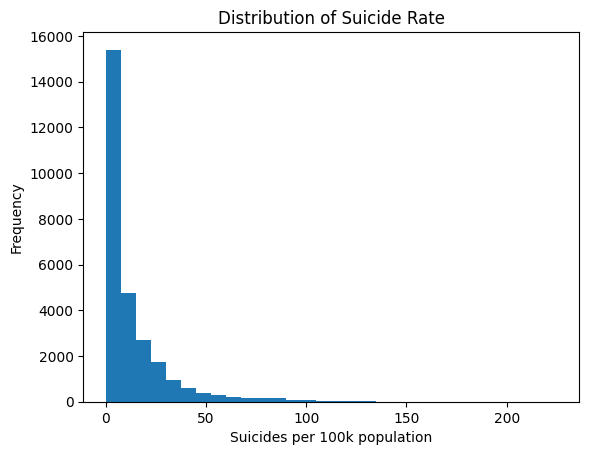

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["suicides/100k pop"], bins=30)
plt.xlabel("Suicides per 100k population")
plt.ylabel("Frequency")
plt.title("Distribution of Suicide Rate")
plt.show()


### Boxplot (Outliers)

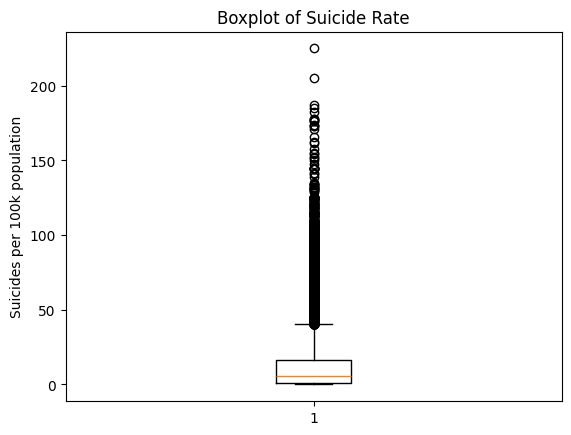

In [ ]:
plt.figure()
plt.boxplot(df["suicides/100k pop"])
plt.ylabel("Suicides per 100k population")
plt.title("Boxplot of Suicide Rate")
plt.show()


### GDP vs Suicide Rate

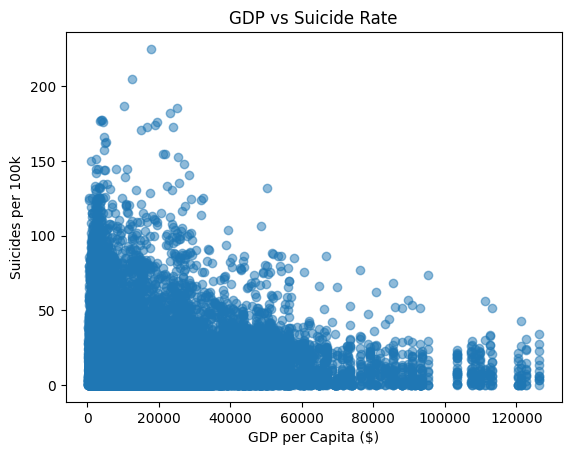

In [ ]:
plt.figure()
plt.scatter(df["gdp_per_capita ($)"], df["suicides/100k pop"], alpha=0.5)
plt.xlabel("GDP per Capita ($)")
plt.ylabel("Suicides per 100k")
plt.title("GDP vs Suicide Rate")
plt.show()


### HDI vs Suicide Rate

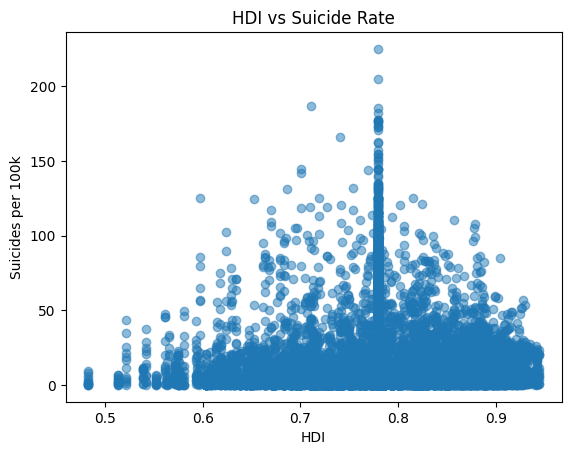

In [ ]:
plt.figure()
plt.scatter(df["HDI for year"], df["suicides/100k pop"], alpha=0.5)
plt.xlabel("HDI")
plt.ylabel("Suicides per 100k")
plt.title("HDI vs Suicide Rate")
plt.show()


### CORRELATION HEATMAP

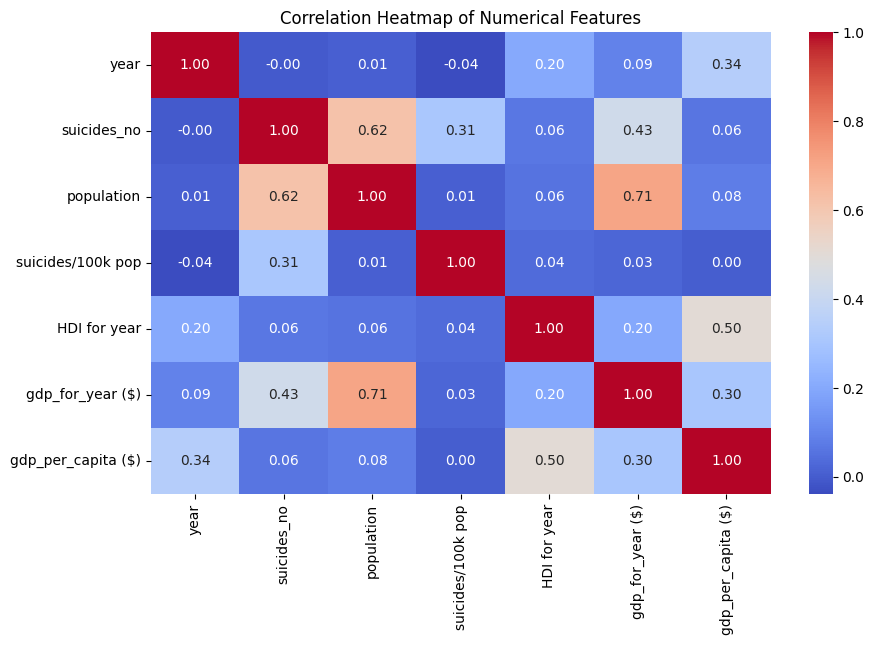

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
num_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


A correlation heatmap was used to analyze the relationships among numerical variables. The suicide rate showed moderate correlation with suicide counts, while socio-economic indicators such as GDP and HDI exhibited weaker correlations. This suggests that the relationship between predictors and the target variable is complex and potentially non-linear

### ENCODING CATEGORICAL VARIABLES

In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(
    df,
    columns=["country", "sex", "age", "generation"],
    drop_first=True
)

# Check result
df_encoded.head()


,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),country_Antigua and Barbuda,country_Argentina,...,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,6.71,Albania1987,0.779,2156624900,796,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1987,16,308000,5.19,Albania1987,0.779,2156624900,796,False,False,...,False,True,False,False,False,False,False,False,False,True
2,1987,14,289700,4.83,Albania1987,0.779,2156624900,796,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1987,1,21800,4.59,Albania1987,0.779,2156624900,796,False,False,...,False,False,False,False,True,True,False,False,False,False
4,1987,9,274300,3.28,Albania1987,0.779,2156624900,796,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df_encoded.shape


(27820, 119)

### TRAIN–TEST SPLIT + TARGET SELECTION

In [ ]:
from sklearn.model_selection import train_test_split

# Define target and features
X = df_encoded.drop(columns=["suicides/100k pop", "country-year"])
y = df_encoded["suicides/100k pop"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Check shapes
X_train.shape, X_test.shape


((22256, 117), (5564, 117))

### FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train & test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shape
X_train_scaled.shape, X_test_scaled.shape


((22256, 117), (5564, 117))

### PRIMARY ML MODEL 1: LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize model
lr = LinearRegression()

# Train model
lr.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

mae_lr, rmse_lr, r2_lr


(8.309727367917892, np.float64(12.740095446801114), 0.5355393630350105)

### PRIMARY ML MODEL 2: RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize model
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Train model (NO scaling needed)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, rmse_rf, r2_rf


(0.3116530733285405, np.float64(1.4645105701388876), 0.9938625414625307)

### COMPARISON OF BOTH MODELS (INITIAL)

In [ ]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

comparison_df


,Model,MAE,RMSE,R2 Score
0,Linear Regression,8.309727,12.740095,0.535539
1,Random Forest,0.311653,1.464511,0.993863


### Actual vs Predicted Linear Regression

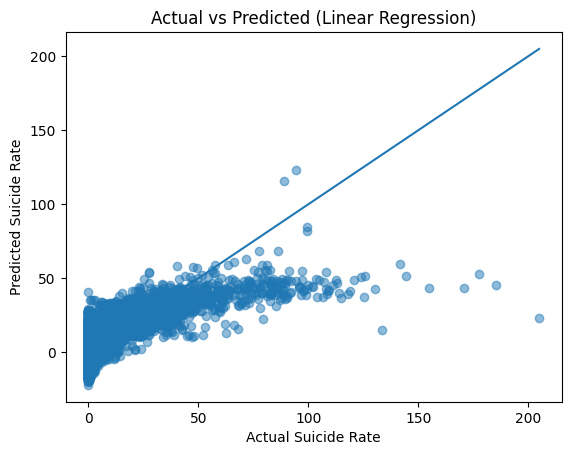

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.xlabel("Actual Suicide Rate")
plt.ylabel("Predicted Suicide Rate")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


### Actual vs Predicted — Random Forest

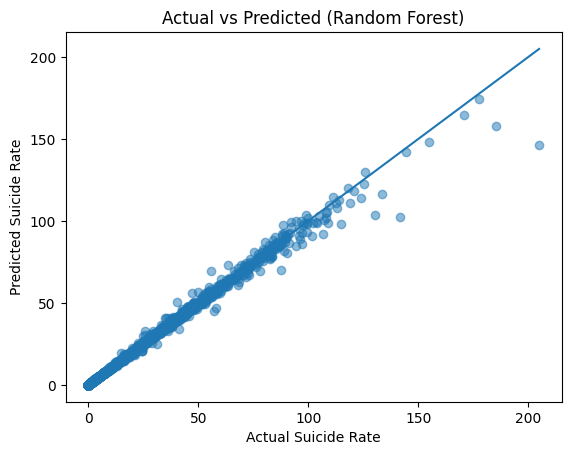

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])

plt.xlabel("Actual Suicide Rate")
plt.ylabel("Predicted Suicide Rate")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()


### Error Comparison (RMSE Bar Chart)

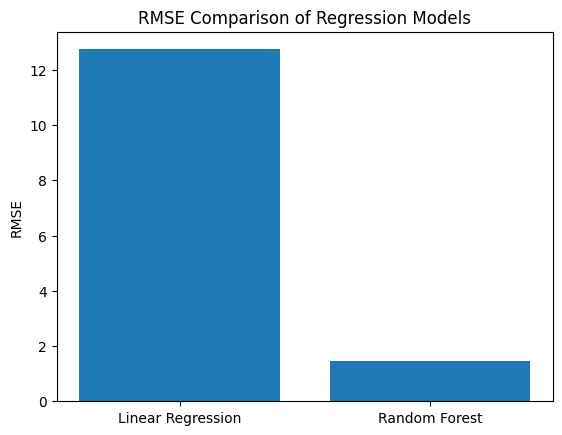

In [ ]:
models = ["Linear Regression", "Random Forest"]
rmse_values = [rmse_lr, rmse_rf]

plt.figure()
plt.bar(models, rmse_values)
plt.ylabel("RMSE")
plt.title("RMSE Comparison of Regression Models")
plt.show()


### Hyper parameter optimization with cross validation

#### Hyperparameters for Linear Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

param_grid_ridge = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

ridge_grid = GridSearchCV(
    ridge,
    param_grid_ridge,
    cv=5,
    scoring="r2"
)

ridge_grid.fit(X_train_scaled, y_train)

ridge_grid.best_params_, ridge_grid.best_score_


({'alpha': 1}, np.float64(0.5466853092953745))

#### Hyperparameters for Random Forest Regressor

In [ ]:
# Hyperparameter tuning for Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define a SMALL and SAFE hyperparameter grid
param_grid = {
    "n_estimators": [100],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV with cross-validation
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,              # 3-fold CV (faster & acceptable)
    scoring="r2",
    n_jobs=-1
)

# Fit on training data
rf_grid.fit(X_train, y_train)

# Get best model and results
best_rf = rf_grid.best_estimator_
best_params = rf_grid.best_params_
best_cv_score = rf_grid.best_score_

print("Best Hyperparameters:")
print(best_params)

print("\nBest Cross-Validation R2 Score:")
print(best_cv_score)


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Cross-Validation R2 Score:
0.9875375918690223


### Summary of Best Hyperparameters and CV Score

In [ ]:
# Summary of best hyperparameters and cross-validation score

best_params = rf_grid.best_params_
best_cv_score = rf_grid.best_score_

print("Summary of Best Hyperparameters:")
print(best_params)

print("\nCross-Validation R2 Score:")
print(best_cv_score)


Summary of Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Cross-Validation R2 Score:
0.9875375918690223


In [ ]:
import pandas as pd

summary_df = pd.DataFrame({
    "Metric": ["Best Hyperparameters", "CV R2 Score"],
    "Value": [str(best_params), best_cv_score]
})

summary_df


,Metric,Value
0,Best Hyperparameters,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
1,CV R2 Score,0.987538


### FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
# Initialize SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)

# Fit on training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Transform test data
X_test_selected = selector.transform(X_test)

X_train_selected.shape, X_test_selected.shape
# Get mask of selected features
selected_mask = selector.get_support()

# Get selected feature names
selected_features = X_train.columns[selected_mask]

selected_features
feature_scores = pd.DataFrame({
    "Feature": X_train.columns,
    "Score": selector.scores_
}).sort_values(by="Score", ascending=False)

feature_scores



,Feature,Score
106,sex_male,4019.654737
1,suicides_no,2288.587331
109,age_5-14 years,1994.146447
111,age_75+ years,1700.513213
115,generation_Millenials,958.505619
...,...,...
69,country_Norway,0.037202
64,country_Mongolia,0.034872
23,country_Canada,0.023211
46,country_Iceland,0.021764


### FEATURE SELECTION DIAGRAM

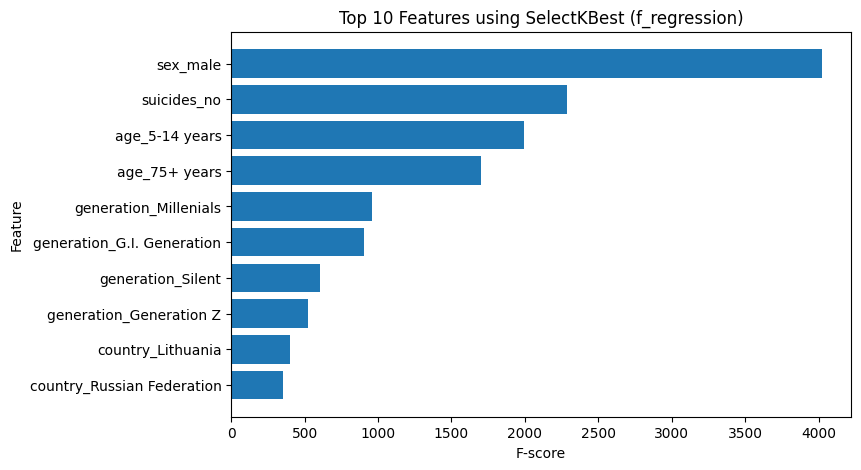

In [ ]:
import matplotlib.pyplot as plt

# Take top 10 features by score
top_k = 10
top_features_scores = feature_scores.head(top_k)

plt.figure(figsize=(8, 5))
plt.barh(
    top_features_scores["Feature"],
    top_features_scores["Score"]
)
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.title("Top 10 Features using SelectKBest (f_regression)")
plt.gca().invert_yaxis()  # highest score on top
plt.show()



Selected Top Features:
Index(['suicides_no', 'sex_male', 'age_5-14 years', 'age_75+ years',
       'generation_Millenials'],
      dtype='object')

New feature set shapes:
X_train_selected: (22256, 5)
X_test_selected: (5564, 5)


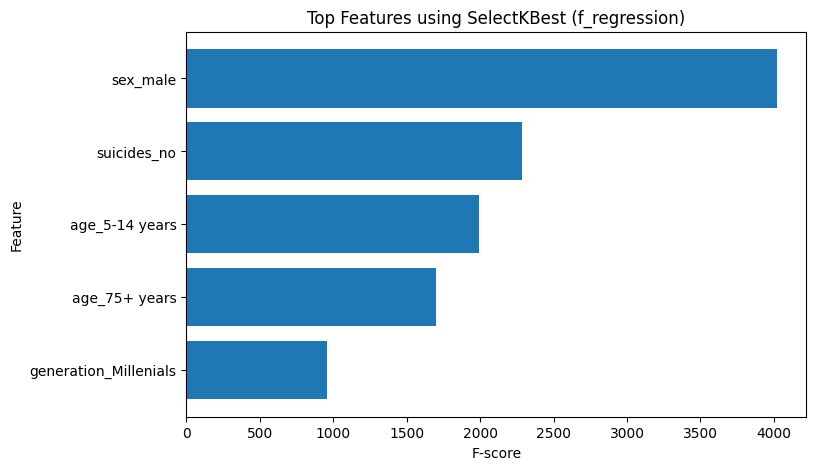

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Apply SelectKBest
# -------------------------------
k = 5  # number of top features to select

selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X_train, y_train)

# -------------------------------
# 2. Get selected feature names
# -------------------------------
selected_features = X_train.columns[selector.get_support()]
print("Selected Top Features:")
print(selected_features)

# -------------------------------
# 3. Create new feature sets
# -------------------------------
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("\nNew feature set shapes:")
print("X_train_selected:", X_train_selected.shape)
print("X_test_selected:", X_test_selected.shape)

# -------------------------------
# 4. Feature scores (for plotting)
# -------------------------------
feature_scores = pd.DataFrame({
    "Feature": X_train.columns,
    "Score": selector.scores_
}).sort_values(by="Score", ascending=False)

# -------------------------------
# 5. Clean, presentable diagram (Top K)
# -------------------------------
plt.figure(figsize=(8, 5))
plt.barh(
    feature_scores.head(k)["Feature"],
    feature_scores.head(k)["Score"]
)
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.title("Top Features using SelectKBest (f_regression)")
plt.gca().invert_yaxis()
plt.show()


### Final models and comparative analysis

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

ridge = Ridge()

grid_search_ridge = GridSearchCV(
    ridge,
    param_grid_ridge,
    cv=5,
    scoring="r2"
)

grid_search_ridge.fit(X_train_sel_scaled, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

final_ridge = Ridge(**grid_search_ridge.best_params_)
final_ridge.fit(X_train_sel_scaled, y_train)

y_pred_ridge_final = final_ridge.predict(X_test_sel_scaled)

cv_scores_ridge = cross_val_score(
    final_ridge,
    X_train_sel_scaled,
    y_train,
    cv=5,
    scoring="r2"
)

print("=== Final Ridge Regression (Model A) ===")
print(f"CV R-squared: {cv_scores_ridge.mean():.4f} (+/- {cv_scores_ridge.std():.4f})")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge_final)):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_ridge_final):.4f}")
print(f"Test R-squared: {r2_score(y_test, y_pred_ridge_final):.4f}")


=== Final Ridge Regression (Model A) ===
CV R-squared: 0.3396 (+/- 0.0050)
Test RMSE: 15.2445
Test MAE: 9.5282
Test R-squared: 0.3350


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_search_rf.fit(X_train_selected, y_train)

print("Best RF Parameters:", grid_search_rf.best_params_)
print("Best CV R2:", grid_search_rf.best_score_)


Best RF Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV R2: 0.5398426118938371


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

final_rf = RandomForestRegressor(
    **grid_search_rf.best_params_,
    random_state=42
)

final_rf.fit(X_train_selected, y_train)

y_pred_rf_final = final_rf.predict(X_test_selected)

cv_scores_rf = cross_val_score(
    final_rf,
    X_train_selected,
    y_train,
    cv=5,
    scoring="r2"
)

print("=== Final Random Forest Regressor (Model B) ===")
print(f"CV R-squared: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf_final)):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_rf_final):.4f}")
print(f"Test R-squared: {r2_score(y_test, y_pred_rf_final):.4f}")


=== Final Random Forest Regressor (Model B) ===
CV R-squared: 0.5398 (+/- 0.0177)
Test RMSE: 12.8829
Test MAE: 6.6747
Test R-squared: 0.5251


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

comparison = pd.DataFrame({
    "Model": [
        "Ridge Regression (Tuned)",
        "Random Forest Regressor (Tuned)"
    ],
    "Selected Features": [
        list(X_train_selected.columns),
        list(X_train_selected.columns)
    ],
    "CV R2 Mean": [
        round(cv_scores_ridge.mean(), 4),
        round(cv_scores_rf.mean(), 4)
    ],
    "CV R2 Std": [
        round(cv_scores_ridge.std(), 4),
        round(cv_scores_rf.std(), 4)
    ],
    "Test RMSE": [
        round(np.sqrt(mean_squared_error(y_test, y_pred_ridge_final)), 4),
        round(np.sqrt(mean_squared_error(y_test, y_pred_rf_final)), 4)
    ],
    "Test R2": [
        round(r2_score(y_test, y_pred_ridge_final), 4),
        round(r2_score(y_test, y_pred_rf_final), 4)
    ],
    "Test Shape": [
        X_test_selected.shape,
        X_test_selected.shape
    ]
})

comparison


,Model,Selected Features,CV R2 Mean,CV R2 Std,Test RMSE,Test R2,Test Shape
0,Ridge Regression (Tuned),"[suicides_no, sex_male, age_5-14 years, age_75...",0.3396,0.0050,15.2445,0.3350,"(5564, 5)"
1,Random Forest Regressor (Tuned),"[suicides_no, sex_male, age_5-14 years, age_75...",0.5398,0.0177,12.8829,0.5251,"(5564, 5)"


Ridge RMSE: 15.244993814895443
Ridge R2: 0.3349442463109603
Random Forest RMSE: 14.037234355142916
Random Forest R2: 0.43614601862527114


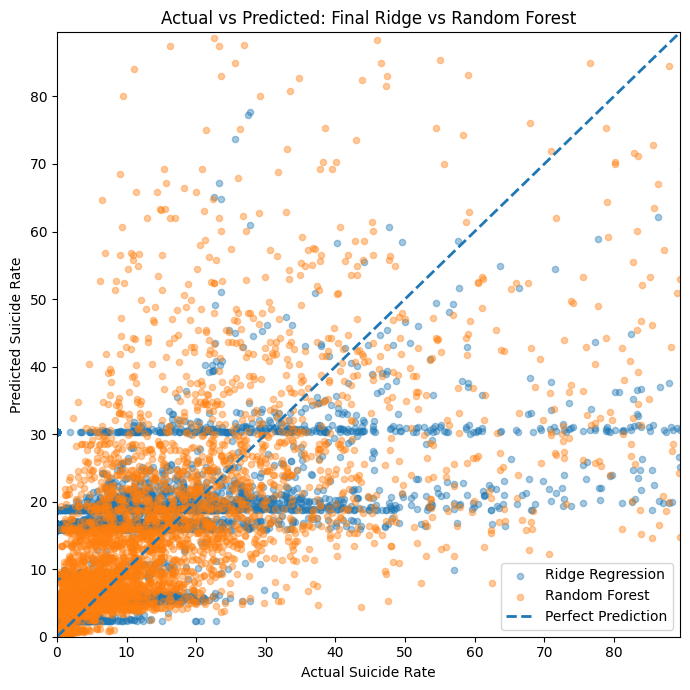

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

final_ridge = Ridge(alpha=1.0)
final_ridge.fit(X_train_scaled, y_train)
y_pred_ridge_final = final_ridge.predict(X_test_scaled)

final_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
final_rf.fit(X_train_selected, y_train)
y_pred_rf_final = final_rf.predict(X_test_selected)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge_final)))
print("Ridge R2:", r2_score(y_test, y_pred_ridge_final))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_final)))
print("Random Forest R2:", r2_score(y_test, y_pred_rf_final))

y_min = np.percentile(y_test, 1)
y_max = np.percentile(y_test, 99)

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred_ridge_final, alpha=0.4, s=20, label="Ridge Regression")
plt.scatter(y_test, y_pred_rf_final, alpha=0.4, s=20, label="Random Forest")
plt.plot([y_min, y_max], [y_min, y_max], linestyle="--", linewidth=2, label="Perfect Prediction")
plt.xlim(y_min, y_max)
plt.ylim(y_min, y_max)
plt.xlabel("Actual Suicide Rate")
plt.ylabel("Predicted Suicide Rate")
plt.title("Actual vs Predicted: Final Ridge vs Random Forest")
plt.legend()
plt.tight_layout()
plt.show()


### Conclusion

In this project, regression models were used to predict suicide rates based on socio-economic factors. The data was cleaned, important features were selected, and two models were trained: Ridge Regression and Random Forest Regressor. Ridge Regression was used as a baseline model, while Random Forest was applied to capture more complex patterns in the data. After tuning the models and evaluating them using cross-validation and test metrics, Random Forest showed better performance with higher accuracy and lower error values.

### Reflection

This project helped me understand the importance of data preprocessing, feature selection, and proper model evaluation. I learned that different models have different strengths, and using cross-validation gives more reliable results than relying only on a test set. Although Random Forest performed better, Ridge Regression was still useful because it is simpler and easier to interpret. Overall, this project improved my understanding of regression modeling and machine learning workflows.